In [1]:
from tqdm import tqdm
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import gymnasium as gym
from gym.envs.registration import register
import gym_anytrading
from gym import error, spaces, utils


from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

import torch

In [2]:
df = pd.read_csv(r"C:\Users\Vansh\INFY - Copy.csv")

In [3]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [4]:
df.set_index('Date',inplace=True)

In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
03-01-2011,3444.00,3469.7,3427.70,3458.35,631068
04-01-2011,3457.00,3499.0,3457.00,3481.45,1014911
05-01-2011,3465.00,3477.0,3445.10,3459.60,440395
06-01-2011,3480.00,3493.0,3444.10,3478.15,586480
07-01-2011,3463.35,3495.0,3356.35,3370.75,1068866


In [6]:
df.shape

(2558, 5)

In [7]:
env_name = 'stocks-v0'
env = gym.make(env_name)

In [23]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [24]:
env.signal_features

array([[ 3.45835e+03,  0.00000e+00],
       [ 3.48145e+03,  2.31000e+01],
       [ 3.45960e+03, -2.18500e+01],
       [ 3.47815e+03,  1.85500e+01],
       [ 3.37075e+03, -1.07400e+02],
       [ 3.39575e+03,  2.50000e+01],
       [ 3.32570e+03, -7.00500e+01],
       [ 3.37730e+03,  5.16000e+01],
       [ 3.20520e+03, -1.72100e+02],
       [ 3.20430e+03, -9.00000e-01],
       [ 3.26880e+03,  6.45000e+01],
       [ 3.32300e+03,  5.42000e+01],
       [ 3.24960e+03, -7.34000e+01],
       [ 3.29590e+03,  4.63000e+01],
       [ 3.24385e+03, -5.20500e+01],
       [ 3.28465e+03,  4.08000e+01],
       [ 3.25965e+03, -2.50000e+01],
       [ 3.19690e+03, -6.27500e+01],
       [ 3.16815e+03, -2.87500e+01],
       [ 3.11770e+03, -5.04500e+01],
       [ 3.08920e+03, -2.85000e+01],
       [ 3.08925e+03,  5.00000e-02],
       [ 3.11760e+03,  2.83500e+01],
       [ 3.04790e+03, -6.97000e+01],
       [ 3.08745e+03,  3.95500e+01],
       [ 3.09660e+03,  9.15000e+00],
       [ 3.13070e+03,  3.41000e+01],
 

In [25]:
env.action_space

Discrete(2)

Info (array([[2846.45,    3.95],
       [2849.85,    3.4 ],
       [2837.05,  -12.8 ],
       [2844.5 ,    7.45],
       [2788.65,  -55.85]], dtype=float32), 0, False, False, {'total_reward': -339.699951171875, 'total_profit': 0.8693720997497144, 'position': <Positions.Long: 1>})


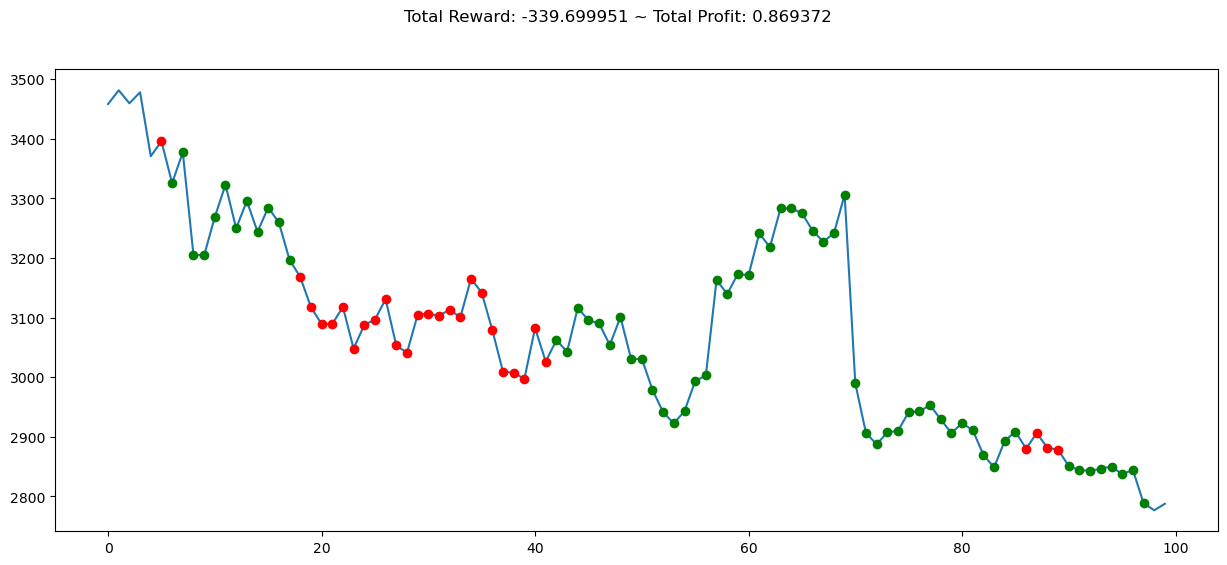

In [28]:
state = env.reset()

while True:
  # action = env.action_space.sample()  # Sample action only once per loop
    for action in range(23): # Use a range for multiple iterations
        action=env.action_space.sample()
        n_state=env.step(action)
        reward=env.step(action)
        done=env.step(action)
        info=env.step(action)

    if done:
        print("Info", info)
        break

# After the loop:
plt.figure(figsize=(15, 6))
plt.gca().clear()  # Use plt.cla() instead of plt.cla
env.render_all()
env.get_wrapper_attr('render_all')  # Likely unnecessary
plt.show()

In [29]:
env_maker=lambda:gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env=DummyVecEnv([env_maker])

In [30]:
from stable_baselines3.a2c import MlpPolicy

In [31]:
model=A2C('MlpPolicy',env,verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 803      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.537   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 2.43e-05 |
|    value_loss         | 1.07e-08 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 810      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.369   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.243    |
|    value_loss      

-------------------------------------
| time/                 |           |
|    fps                | 835       |
|    iterations         | 1700      |
|    time_elapsed       | 10        |
|    total_timesteps    | 8500      |
| train/                |           |
|    entropy_loss       | -0.0108   |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 1699      |
|    policy_loss        | -6.25e-11 |
|    value_loss         | 5.01e-16  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 836      |
|    iterations         | 1800     |
|    time_elapsed       | 10       |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.00515 |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | 1.19e-10 |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 844       |
|    iterations         | 3300      |
|    time_elapsed       | 19        |
|    total_timesteps    | 16500     |
| train/                |           |
|    entropy_loss       | -0.00105  |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3299      |
|    policy_loss        | -1.06e-07 |
|    value_loss         | 1.28e-06  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 844      |
|    iterations         | 3400     |
|    time_elapsed       | 20       |
|    total_timesteps    | 17000    |
| train/                |          |
|    entropy_loss       | -0.00105 |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 3399     |
|    policy_loss        | -3.5e-08 |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 839       |
|    iterations         | 4900      |
|    time_elapsed       | 29        |
|    total_timesteps    | 24500     |
| train/                |           |
|    entropy_loss       | -0.00105  |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4899      |
|    policy_loss        | -8.94e-09 |
|    value_loss         | 9.2e-09   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 838       |
|    iterations         | 5000      |
|    time_elapsed       | 29        |
|    total_timesteps    | 25000     |
| train/                |           |
|    entropy_loss       | -0.000828 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4999      |
|    policy_loss        | -1.89e-09 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 829       |
|    iterations         | 6500      |
|    time_elapsed       | 39        |
|    total_timesteps    | 32500     |
| train/                |           |
|    entropy_loss       | -0.000828 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 6499      |
|    policy_loss        | 6.44e-08  |
|    value_loss         | 8.05e-07  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 829       |
|    iterations         | 6600      |
|    time_elapsed       | 39        |
|    total_timesteps    | 33000     |
| train/                |           |
|    entropy_loss       | -0.000828 |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 6599      |
|    policy_loss        | -4.57e-08 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 826       |
|    iterations         | 8100      |
|    time_elapsed       | 49        |
|    total_timesteps    | 40500     |
| train/                |           |
|    entropy_loss       | -0.000359 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 8099      |
|    policy_loss        | -2.74e-11 |
|    value_loss         | 8.6e-13   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 826       |
|    iterations         | 8200      |
|    time_elapsed       | 49        |
|    total_timesteps    | 41000     |
| train/                |           |
|    entropy_loss       | -0.000359 |
|    explained_variance | -118      |
|    learning_rate      | 0.0007    |
|    n_updates          | 8199      |
|    policy_loss        | 2.54e-10  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 827       |
|    iterations         | 9700      |
|    time_elapsed       | 58        |
|    total_timesteps    | 48500     |
| train/                |           |
|    entropy_loss       | -0.000359 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 9699      |
|    policy_loss        | -3.82e-09 |
|    value_loss         | 1.8e-08   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 827       |
|    iterations         | 9800      |
|    time_elapsed       | 59        |
|    total_timesteps    | 49000     |
| train/                |           |
|    entropy_loss       | -0.000359 |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9799      |
|    policy_loss        | -2.31e-10 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 826       |
|    iterations         | 11300     |
|    time_elapsed       | 68        |
|    total_timesteps    | 56500     |
| train/                |           |
|    entropy_loss       | -0.000359 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11299     |
|    policy_loss        | 5.07e-09  |
|    value_loss         | 3.31e-08  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 826       |
|    iterations         | 11400     |
|    time_elapsed       | 68        |
|    total_timesteps    | 57000     |
| train/                |           |
|    entropy_loss       | -0.000359 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 11399     |
|    policy_loss        | 5.23e-09  |
|    value_l

KeyboardInterrupt: 

Info (array([[2809.85,  -48.25],
       [2852.45,   42.6 ],
       [2883.85,   31.4 ],
       [2855.3 ,  -28.55],
       [2817.4 ,  -37.9 ]], dtype=float32), 0, False, False, {'total_reward': 1.7998046875, 'total_profit': 0.8293131685120883, 'position': <Positions.Short: 0>})


C:\Users\Vansh\Anaconda New\New folder\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


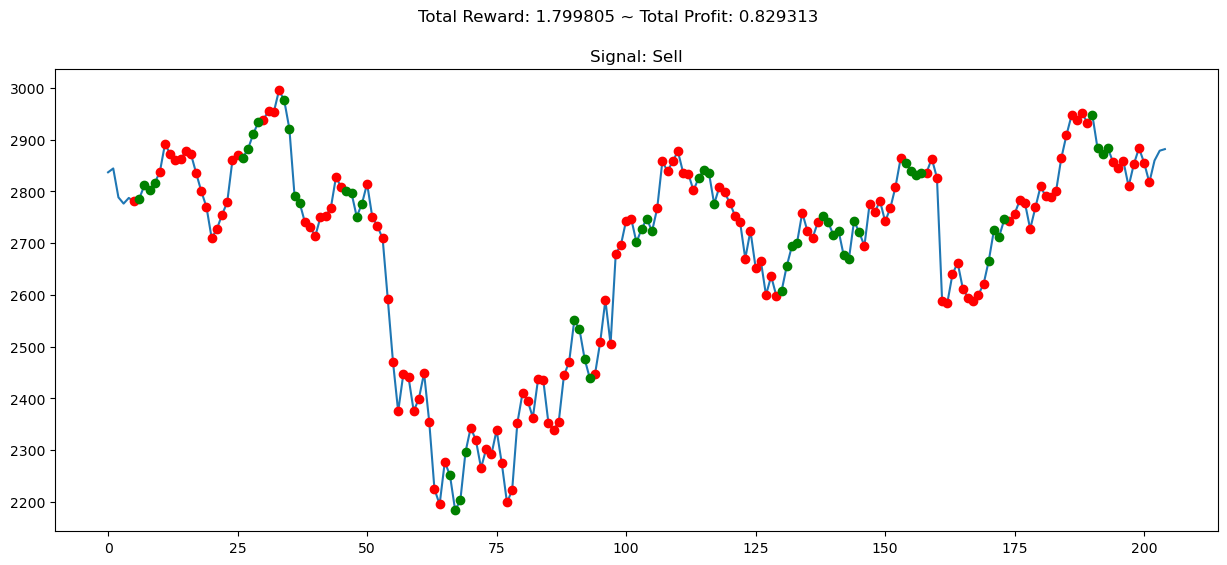

In [38]:
env=gym.make('stocks-v0',df=df,frame_bound=(100,300),window_size=5)
obs = env.reset()

while True:
    for action in range(49):
        obs = np.zeros((1, 5, 2))
        obs = obs[0][:5, :2]
        action = model.predict(obs)[0]  # Get the first action

        # Map action to signal (assuming 0 for sell, 1 for buy)
        signal = "Sell" if action == 0 else "Buy"
        obs = env.step(action)  # Single call to env.step()
        reward=env.step(action)
        done=env.step(action)
        info=env.step(action)
    if done:
        print("Info", info)
        break

plt.figure(figsize=(15, 6))
plt.cla
env.render_all()
plt.title(f"Signal: {signal}")  # Add signal to title
plt.show()